## <font color='blue'>Assignment V : Reinforcement Learning </font>
##### <font color='black'>14S3205 - Artificial Intelligence</font>
##### <font color='black'>Even Semester 2019/2020</font>

<font color='Black'>NIM : 14S16039 </font>

<font color='Black'>Name : Sangapan Panjaitan </font>

#### <font color='Red'>Exercise 1<font>

In [3]:
#import libraries
import numpy as np

#define the shape of the environment (i.e., its states)
environment_rows = 11
environment_columns = 11

#Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
#The array contains 11 rows and 11 columns (to match the shape of the environment), as well as a third "action" dimension.
#The "action" dimension consists of 4 layers that will allow us to keep track of the Q-values for each possible action in
#each state (see next cell for a description of possible actions). 
#The value of each (state, action) pair is initialized to 0.
q_values = np.zeros((environment_rows, environment_columns, 4))

#define actions
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 11 rows and 11 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[0, 5] = 100. #set the reward for the packaging area (i.e., the goal) to 100

#define aisle locations (i.e., white squares) for rows 1 through 9
aisles = {} #store locations in a dictionary
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

#set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 10):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.
  
#print rewards matrix
for row in rewards:
  print(row)

#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

#define a function that will choose a random, non-terminal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_columns)
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  return current_row_index, current_column_index

#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

#Define a function that will get the shortest path between any location within the warehouse that 
#the robot is allowed to travel and the item packaging location.
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)
    
    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

#display a few shortest paths
print(get_shortest_path(3, 9)) #starting at row 3, column 9
print(get_shortest_path(5, 0)) #starting at row 5, column 0
print(get_shortest_path(9, 5)) #starting at row 9, column 5

#display an example of reversed shortest path
path = get_shortest_path(5, 2) #go to row 5, column 2
path.reverse()
print(path)

[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
Training complete!
[[3, 9], [2, 9], [1, 9], [1, 8], [1, 7], [1, 6], [1, 5], [0, 5]]
[[5, 0], [5, 1], [5, 2], [5, 3], [4, 3], [3, 3], [3, 2], [3, 1], [2, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [0, 5]]
[[9, 5], [9, 4], [9, 3], [8, 3], [7, 3], [7, 4], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4

#### <font color='Red'>Exercise 2</font>

Agent trained with SARSA after 500 iterations
[[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Agent trained with Q-learning after 500 iterations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]


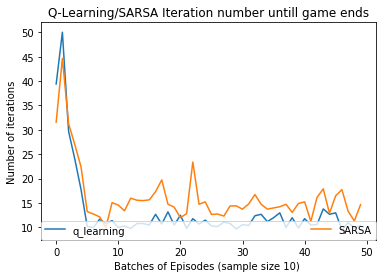

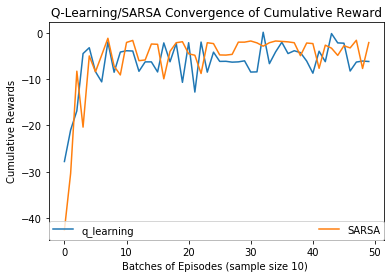

Visualize environment Q-learning
[ -5.82853129  -5.64430816  -5.17352817  -4.95461453  -4.21674584
  -3.48386663  -3.53127388  -2.61293067  -1.58220322  -1.52973546
  -0.27422485  -1.4446875   -5.4746574   -5.13241275  -4.72475148
  -4.30102021  -3.21870761  -2.36387808  -2.29400657  -0.77357324
  -0.46657725   1.04591259   2.96578896   1.83595733  -4.47763523
 -27.93882867 -27.42353549 -26.871445   -26.23395182 -25.54097295
 -24.37603139 -23.90871705 -22.94046351 -21.88998836 -20.70905453
   7.5007743  -28.54619341   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.        ]
AxesSubplot(0.125,0.125;0.62x0.755)
Visualize SARSA
[ -7.67066839  -7.63345361  -5.99634003  -5.17523997  -4.56819143
  -4.10747838  -3.19909172  -2.21472802  -1.3784      -0.14822493
   1.81085895   2.85070784  -7.24875361  -7.52959835 -14.77960938
  -6.32556066  -7.36101799  -4.66407459  -4.8070934   -2.91724638
  -1.93383193  -4.30819079   1.6

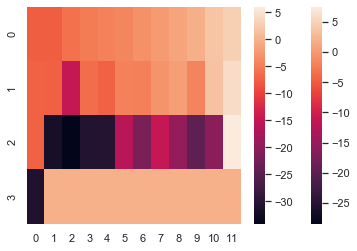

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


    
# Creates a table of Q_values (state-action) initialized with zeros
# Initialize Q(s, a), for all s ∈ S, a ∈ A(s), arbitrarily, and Q(terminal-state, ·) = 0.
def createQ_table(rows = 4, cols = 12):
    """
    Implementation of creating a table for the Q(s, a) 'value state-action pair'
    
    Args:
        rows -- type(int) Number of rows the simple grid world
        cols -- type(int) Number of columns in the simple grid world
    
    Returns:
        q_table -- type(np.array) 2D representation of state-action pair table 
                                     Rows are actions and columns are the states. 
    """
    # initialize the q_table with all zeros for each state and action
    q_table = np.zeros((4, cols * rows))

    # define an action dictionary to access corresponding state-action pairs fast
    action_dict =  {"UP": q_table[0, :],"LEFT": q_table[1, :], "RIGHT": q_table[2, :], "DOWN": q_table[3, :]}
    
    return q_table


# Choosing action using policy
# Sutton's code pseudocode: Choose A from S using policy derived from Q (e.g., ε-greedy)
# %10 exploration to avoid stucking at a local optima
def epsilon_greedy_policy(state, q_table, epsilon = 0.1):
    """
    Epsilon greedy policy implementation takes the current state and q_value table 
    Determines which action to take based on the epsilon-greedy policy
    
    Args:
        epsilon -- type(float) Determines exploration/explotion ratio
        state -- type(int) Current state of the agent value between [0:47]
        q_table -- type(np.array) Determines state value
        
    Returns:
        action -- type(int) Choosen function based on Q(s, a) pairs & epsilon
    """
    # choose a random int from an uniform distribution [0.0, 1.0) 
    decide_explore_exploit  = np.random.random()
    
    if(decide_explore_exploit < epsilon):
        action = np.random.choice(4) # UP = 0, LEFT = 1, RIGHT = 2, DOWN = 3
    else:
        action = np.argmax(q_table[:, state]) # Choose the action with largest Q-value (state value)
        
    return action
    


def move_agent(agent, action):
    """
    Moves the agent based on action to take
    
    Args:
        agent -- type(tuple) x, y coordinate of the agent on the grid
        action -- type(int) updates agent's position 
        
    Returns:
        agent -- type(tuple) new coordinate of the agent
    """
    # get position of the agent
    (posX , posY) = agent
    # UP 
    if ((action == 0) and posX > 0):
        posX = posX - 1
    # LEFT
    if((action == 1) and (posY > 0)):
        posY = posY - 1
    # RIGHT
    if((action == 2) and (posY < 11)):
        posY = posY + 1
    # DOWN
    if((action) == 3 and (posX < 3)):
        posX = posX + 1
    agent = (posX, posY)
    
    return agent


def get_state(agent, q_table):
    """
    Determine the state and state value given agent's position
    
    Args:
        agent -- type(tuple) x, y coordinate of the agent on the grid
        q_table -- type(np.array) Determines state value
        
    Returns:
        state -- type(int) state value between [0,47]
        max_state_value -- type(float) maximum state value at the position of the agent
    """
    # get position of the agent
    (posX , posY) = agent
    
    # obtain the state value
    state = 12 * posX + posY
    
    # get maximum state value from the table
    state_action = q_table[:, int(state)]
    maximum_state_value = np.amax(state_action) # return the state value with for the highest action
    return state, maximum_state_value

def get_reward(state):
    """
    Function returns reward in the given state
    
    Args:
        state -- type(int) state value between [0,47]
        
    Returns: 
        reward -- type(int) Reward in the corresponding state 
        game_end -- type(bool) Flag indicates game end (falling out of cliff / reaching the goal)
    """
    # game continues
    game_end = False
    # all states except cliff have -1 value
    reward = -1
    # goal state
    if(state == 47):
        game_end = True
        reward = 10
    # cliff
    if(state >= 37 and state <= 46):
        game_end = True
        # Penalize the agent if agent encounters a cliff
        reward = -100

    return reward, game_end

def update_qTable(q_table, state, action, reward, next_state_value, gamma_discount = 0.9, alpha = 0.5):
    """
    Update the q_table based on observed rewards and maximum next state value
    Sutton's Book pseudocode:  Q(S, A) <- Q(S, A) + [alpha * (reward + (gamma * maxValue(Q(S', A'))) -  Q(S, A) ]
    
    Args:
        q_table -- type(np.array) Determines state value
        state -- type(int) state value between [0,47]
        action -- type(int) action value [0:3] -> [UP, LEFT, RIGHT, DOWN]
        reward -- type(int) reward in the corresponding state 
        next_state_value -- type(float) maximum state value at next state
        gamma_discount -- type(float) discount factor determines importance of future rewards
        alpha -- type(float) controls learning convergence
        
    Returns:
        q_table -- type(np.array) Determines state value
    """
    update_q_value = q_table[action, state] + alpha * (reward + (gamma_discount * next_state_value) - q_table[action, state])
    q_table[action, state] = update_q_value

    return q_table    

def qlearning(num_episodes = 500, gamma_discount = 0.9, alpha = 0.5, epsilon = 0.1):
    """
    Implementation of q-learning algorithm. (Sutton's book)
    
    Args:
        num_episodes -- type(int) number of games to train agent
        gamma_discount -- type(float) discount factor determines importance of future rewards
        alpha -- type(float) determines convergence rate of the algorithm (can think as updating states fast or slow)
        epsilon -- type(float) explore/ exploit ratio (exe: default value 0.1 indicates %10 exploration)
        
    Returns:
        q_table -- type(np.array) Determines state value
        reward_cache -- type(list) contains cumulative_reward
    """
    # initialize all states to 0
    # Terminal state cliff_walking ends
    reward_cache = list()
    step_cache = list()
    q_table = createQ_table()
    agent = (3, 0) # starting from left down corner
    # start iterating through the episodes
    for episode in range(0, num_episodes):
        env = np.zeros((4, 12))
        env = visited_env(agent, env)
        agent = (3, 0) # starting from left down corner
        game_end = False
        reward_cum = 0 # cumulative reward of the episode
        step_cum = 0 # keeps number of iterations untill the end of the game
        while(game_end == False):
            # get the state from agent's position
            state, _ = get_state(agent, q_table)
            # choose action using epsilon-greedy policy
            action = epsilon_greedy_policy(state, q_table)
            # move agent to the next state
            agent = move_agent(agent, action)
            step_cum += 1
            env = visited_env(agent, env) # mark the visited path
            # observe next state value
            next_state, max_next_state_value = get_state(agent, q_table)
            # observe reward and determine whether game ends
            reward, game_end = get_reward(next_state)
            reward_cum += reward 
            # update q_table
            q_table = update_qTable(q_table, state, action, reward, max_next_state_value, gamma_discount, alpha)
            # update the state
            state = next_state
        reward_cache.append(reward_cum)
        if(episode > 498):
            print("Agent trained with Q-learning after 500 iterations")
            print(env) # display the last 2 path agent takes 
        step_cache.append(step_cum)
    return q_table, reward_cache, step_cache

def sarsa(num_episodes = 500, gamma_discount = 0.9, alpha = 0.5, epsilon = 0.1):
    """
    Implementation of SARSA algorithm. (Sutton's book)
    
    Args:
        num_episodes -- type(int) number of games to train agent
        gamma_discount -- type(float) discount factor determines importance of future rewards
        alpha -- type(float) determines convergence rate of the algorithm (can think as updating states fast or slow)
        epsilon -- type(float) explore/ exploit ratio (exe: default value 0.1 indicates %10 exploration)
        
    Returns:
        q_table -- type(np.array) Determines state value
        reward_cache -- type(list) contains cumulative_reward
    """
    # initialize all states to 0
    # Terminal state cliff_walking ends
    q_table = createQ_table()
    step_cache = list()
    reward_cache = list()
    # start iterating through the episodes
    for episode in range(0, num_episodes):
        agent = (3, 0) # starting from left down corner
        game_end = False
        reward_cum = 0 # cumulative reward of the episode
        step_cum = 0 # keeps number of iterations untill the end of the game
        env = np.zeros((4, 12))
        env = visited_env(agent, env)
        # choose action using policy
        state, _ = get_state(agent, q_table)
        action = epsilon_greedy_policy(state, q_table)
        while(game_end == False):
            # move agent to the next state
            agent = move_agent(agent, action)
            env = visited_env(agent, env)
            step_cum += 1
            # observe next state value
            next_state, _ = get_state(agent, q_table)
            # observe reward and determine whether game ends
            reward, game_end = get_reward(next_state)
            reward_cum += reward 
            # choose next_action using policy and next state
            next_action = epsilon_greedy_policy(next_state, q_table)
            # update q_table
            next_state_value = q_table[next_action][next_state] # differs from q-learning uses the next action determined by policy
            q_table = update_qTable(q_table, state, action, reward, next_state_value, gamma_discount, alpha)
            # update the state and action
            state = next_state
            action = next_action # differs q_learning both state and action must updated
        reward_cache.append(reward_cum)
        step_cache.append(step_cum)
        if(episode > 498):
            print("Agent trained with SARSA after 500 iterations")
            print(env) # display the last 2 path agent takes 
    return q_table, reward_cache, step_cache

def visited_env(agent, env):
    """
        Visualize the path agent takes
        
    """
    (posY, posX) = agent
    env[posY][posX] = 1
    return env
    
    
def retrieve_environment(q_table, action):
    """
    Displays the environment state values for a specific action
    Implemented for debug purposes
    
    Args:
        q_table -- type(np.array) Determines state value
        action -- type(int) action value [0:3] -> [UP, LEFT, RIGHT, DOWN]
    """
    env = q_table[action, :].reshape((4, 12))
    print(env) # display environment values
    
def plot_cumreward_normalized(reward_cache_qlearning, reward_cache_SARSA):
    """
    Visualizes the reward convergence
    
    Args:
        reward_cache -- type(list) contains cumulative_reward
    """
    cum_rewards_q = []
    rewards_mean = np.array(reward_cache_qlearning).mean()
    rewards_std = np.array(reward_cache_qlearning).std()
    count = 0 # used to determine the batches
    cur_reward = 0 # accumulate reward for the batch
    for cache in reward_cache_qlearning:
        count = count + 1
        cur_reward += cache
        if(count == 10):
            # normalize the sample
            normalized_reward = (cur_reward - rewards_mean)/rewards_std
            cum_rewards_q.append(normalized_reward)
            cur_reward = 0
            count = 0
            
    cum_rewards_SARSA = []
    rewards_mean = np.array(reward_cache_SARSA).mean()
    rewards_std = np.array(reward_cache_SARSA).std()
    count = 0 # used to determine the batches
    cur_reward = 0 # accumulate reward for the batch
    for cache in reward_cache_SARSA:
        count = count + 1
        cur_reward += cache
        if(count == 10):
            # normalize the sample
            normalized_reward = (cur_reward - rewards_mean)/rewards_std
            cum_rewards_SARSA.append(normalized_reward)
            cur_reward = 0
            count = 0      
    # prepare the graph    
    plt.plot(cum_rewards_q, label = "q_learning")
    plt.plot(cum_rewards_SARSA, label = "SARSA")
    plt.ylabel('Cumulative Rewards')
    plt.xlabel('Batches of Episodes (sample size 10) ')
    plt.title("Q-Learning/SARSA Convergence of Cumulative Reward")
    plt.legend(loc='lower right', ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    
def plot_number_steps(step_cache_qlearning, step_cache_SARSA):
    """
        Visualize number of steps taken
    """    
    cum_step_q = []
    steps_mean = np.array(step_cache_qlearning).mean()
    steps_std = np.array(step_cache_qlearning).std()
    count = 0 # used to determine the batches
    cur_step = 0 # accumulate reward for the batch
    for cache in step_cache_qlearning:
        count = count + 1
        cur_step += cache
        if(count == 10):
            # normalize the sample
            normalized_step = (cur_step - steps_mean)/steps_std
            cum_step_q.append(normalized_step)
            cur_step = 0
            count = 0
            
    cum_step_SARSA = []
    steps_mean = np.array(step_cache_SARSA).mean()
    steps_std = np.array(step_cache_SARSA).std()
    count = 0 # used to determine the batches
    cur_step = 0 # accumulate reward for the batch
    for cache in step_cache_SARSA:
        count = count + 1
        cur_step += cache
        if(count == 10):
            # normalize the sample
            normalized_step = (cur_step - steps_mean)/steps_std
            cum_step_SARSA.append(normalized_step)
            cur_step = 0
            count = 0      
    # prepare the graph    
    plt.plot(cum_step_q, label = "q_learning")
    plt.plot(cum_step_SARSA, label = "SARSA")
    plt.ylabel('Number of iterations')
    plt.xlabel('Batches of Episodes (sample size 10) ')
    plt.title("Q-Learning/SARSA Iteration number untill game ends")
    plt.legend(loc='lower right', ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    

    
def plot_qlearning_smooth(reward_cache):
    """
    Visualizes the reward convergence using weighted average of previous 10 cumulative rewards
    NOTE: Normalization gives better visualization
    
    Args:
        reward_cache -- type(list) contains cumulative_rewards for episodes
    """
    mean_rev = (np.array(reward_cache[0:11]).sum())/10
    # initialize with cache mean
    cum_rewards = [mean_rev] * 10
    idx = 0
    for cache in reward_cache:
        cum_rewards[idx] = cache
        idx += 1
        smooth_reward = (np.array(cum_rewards).mean())
        cum_rewards.append(smooth_reward)
        if(idx == 10):
            idx = 0
        
    plt.plot(cum_rewards)
    plt.ylabel('Cumulative Rewards')
    plt.xlabel('Batches of Episodes (sample size 10) ')
    plt.title("Q-Learning  Convergence of Cumulative Reward")
    plt.legend(loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
    plt.show()

def generate_heatmap(q_table):
    """
        Generates heatmap to visualize agent's learned actions on the environment
    """
    import seaborn as sns; sns.set()
    # display mean of environment values using a heatmap
    data = np.mean(q_table, axis = 0)
    print(data)
    data = data.reshape((4, 12))
    ax = sns.heatmap(np.array(data))
    return ax
    
def main():
    # Learn state dynamics obtain cumulative rewards for 500 episodes
    #SARSA
    q_table_SARSA, reward_cache_SARSA, step_cache_SARSA = sarsa()
    # QLEARNING
    q_table_qlearning, reward_cache_qlearning, step_cache_qlearning = qlearning()
    plot_number_steps(step_cache_qlearning, step_cache_SARSA)
    # Visualize the result
    plot_cumreward_normalized(reward_cache_qlearning,reward_cache_SARSA)
    
    # generate heatmap
    print("Visualize environment Q-learning")
    ax_q = generate_heatmap(q_table_qlearning)
    print(ax_q)
    
    print("Visualize SARSA")
    ax_SARSA = generate_heatmap(q_table_SARSA)
    print(ax_SARSA)
    
    # Debug method giving information about what are some states for environment
    want_to_see_env = False
    if(want_to_see_env):
        print("UP")
        retrieve_environment(q_table_qlearning, 0)
        print("LEFT")
        retrieve_environment(q_table_qlearning, 1)
        print("RIGHT")
        retrieve_environment(q_table_qlearning, 2)
        print("DOWN")
        retrieve_environment(q_table_qlearning, 3)
    want_to_see_env = False
    if(want_to_see_env):
        print("UP")
        retrieve_environment(q_table_SARSA, 0)
        print("LEFT")
        retrieve_environment(q_table_SARSA, 1)
        print("RIGHT")
        retrieve_environment(q_table_SARSA, 2)
        print("DOWN")
        retrieve_environment(q_table_SARSA, 3)
    
if __name__ == "__main__":
    # call main function to execute grid world
    main()

### <font color='blue'></font>

In [ ]:
#references
#https://medium.com/@lgvaz/understanding-q-learning-the-cliff-walking-problem-80198921abbc
#https://github.com/zeynepCankara/Cliff-Walking-Solution/blob/master/cliff_walking.py
